# [Multi-spectral multi-image super-resolution of Sentinel-2 with radiometric consistency losses and its effect on building delineation](https://www.sciencedirect.com/science/article/pii/S0924271622002878)

**Muhammed Razzak, Gonzalo Mateo-Garcia, Gurvan Lecuyer, Luis Gómez-Chova, Yarin Gal and Freddie Kalaitzis**

ISPRS Journal of Photogrammetry and Remote Sensing, vol. 195, pp. 1–13, Jan. 2023, DOI: [10.1016/j.isprsjprs.2022.10.019](https://doi.org/10.1016/j.isprsjprs.2022.10.019).

*High resolution remote sensing imagery is used in a broad range of tasks, including detection and classification of objects. High-resolution imagery is however expensive to obtain, while lower resolution imagery is often freely available and can be used for a range of social good applications. To that end, we curate a multi-spectral multi-image dataset for super-resolution of satellite images. We use PlanetScope imagery from the SpaceNet-7 challenge as the high resolution reference and multiple Sentinel-2 revisits of the same location as the low-resolution imagery. We present the first results of applying multi-image super-resolution (MISR) to multi-spectral remote sensing imagery. We, additionally, introduce a radiometric-consistency module into the MISR model to preserve the high radiometric resolution and quality of the Sentinel-2 sensor. We show that MISR is superior to single-image super-resolution (SISR) and other baselines on a range of image fidelity metrics. Furthermore, we present the first assessment of the utility of multi-image super-resolution on a semantic and instance segmentation – common remote sensing tasks – showing that utilizing multiple images results in better performance in these downstream tasks, but MISR pre-processing is non-essential.*

## Download the dataset

In [ ]:
!gsutil -m cp -rn gs://fdl_misr/public /content

In [1]:
# root_folder = "/media/disk/databases/SRPlanetS2/public"
root_folder = "/content/public"

## Plot image locations

In [2]:
from glob import glob
import os
import pandas as pd
import geopandas as gpd
from shapely.geometry import box
import rasterio
import rasterio.warp

iids = glob(os.path.join(root_folder, "*"))

data = []
crs = "EPSG:4326"
for iid in iids:
    s2files = glob(os.path.join(iid,"S2L2A/*.tif"))
    
    nfiles = len(s2files)
    with rasterio.open(s2files[0]) as src:
        pol = box(*rasterio.warp.transform_bounds(src.crs, crs, *src.bounds))
        
    # print(f"{os.path.basename(iid)} {nfiles}")
    data.append({"scene_id": os.path.basename(iid), "# S2 revisits": nfiles, "geometry": pol})
    
data = gpd.GeoDataFrame(data, crs=crs)
# data.to_crs("EPSG:4326", inplace=True)
data.explore(color="red",style_kwds={"weight":4})

In [17]:
data

,scene_id,# S2 revisits,geometry
0,L15-1703E-1219N_6813_3313_13,26,"POLYGON ((119.44343 32.47263, 119.44343 32.509..."
1,L15-0361E-1300N_1446_2989_13,26,"POLYGON ((-116.41106 43.64397, -116.41106 43.6..."
2,L15-0683E-1006N_2732_4164_13,14,"POLYGON ((-59.89748 -3.03088, -59.89748 -2.986..."
3,L15-1848E-0793N_7394_5018_13,27,"POLYGON ((144.97566 -37.54463, 144.97566 -37.5..."
4,L15-1204E-1204N_4819_3372_13,13,"POLYGON ((31.81639 30.25908, 31.81639 30.29702..."
5,L15-1617E-1207N_6468_3360_13,26,"POLYGON ((104.28230 30.71352, 104.28230 30.751..."
6,L15-1672E-1207N_6691_3363_13,27,"POLYGON ((114.08201 30.60003, 114.08201 30.637..."
7,L15-1709E-1112N_6838_3742_13,14,"POLYGON ((120.54206 15.32650, 120.54206 15.368..."
8,L15-1289E-1169N_5156_3514_13,12,"POLYGON ((46.62605 24.72681, 46.62605 24.76678..."
9,L15-1014E-1375N_4056_2688_13,26,"POLYGON ((-1.71388 52.45602, -1.71388 52.48278..."


## Plot S2 images

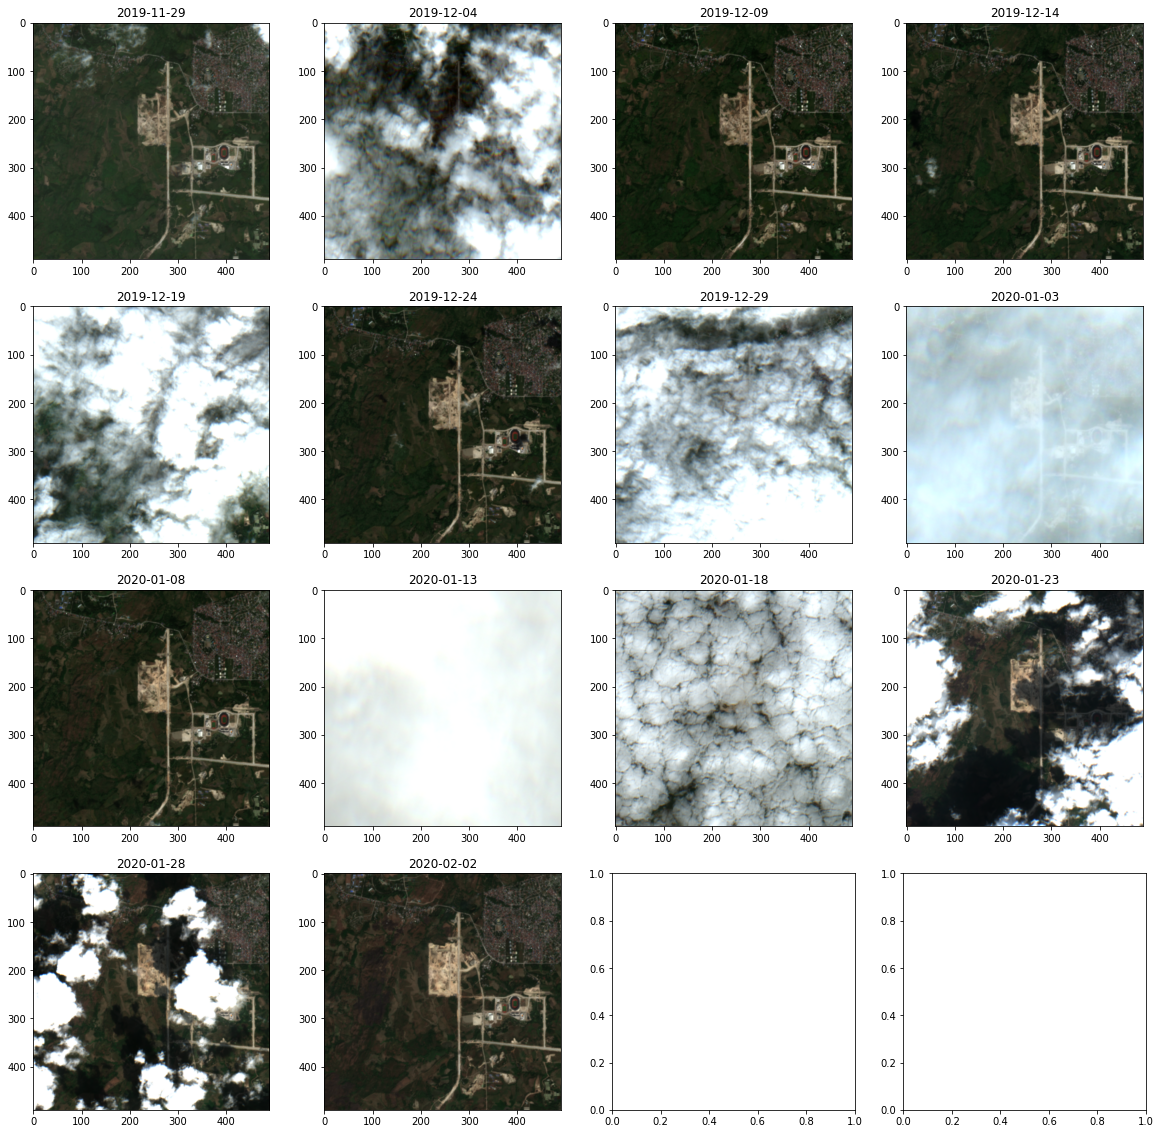

In [18]:
import rasterio
import rasterio.plot as rasterioplt
import numpy as np
import matplotlib.pyplot as plt
import math


# L15-1389E-1284N_5557_3054_13 -> 27
product_id = "L15-1015E-1062N_4061_3941_13"
product_id = "L15-1709E-1112N_6838_3742_13"
images_paths = sorted(glob(os.path.join(root_folder,product_id, "S2L2A/*.tif")))

n_cols = 4
n_rows = math.ceil(len(images_paths)/n_cols)

fig, ax = plt.subplots(n_rows, n_cols, figsize=(20,5*n_rows))

ax = ax.flatten()
for axi, ipath in zip(ax, images_paths):
    with rasterio.open(ipath) as src:
        img = src.read([4, 3, 2])
    rasterioplt.show(np.clip(img / 5000.,0, 1), ax=axi) # , transform=src.transform
    axi.set_title(os.path.splitext(os.path.basename(ipath))[0])
    
# for axi in ax:
#     axi.axis("off")


## Plot PlanetScope image

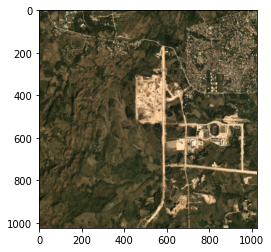

<AxesSubplot:>

In [19]:
planet_image = os.path.join(root_folder,f"{product_id}/images/global_monthly_2020_01_mosaic_{product_id}.tif")
assert os.path.exists(planet_image), f"File {planet_image} does not exists"

with rasterio.open(planet_image) as src:
    img = src.read([1, 2, 3])
rasterioplt.show(img)

## Cite

If you find this work useful please cite:

```
@article{razzak_multi-spectral_2023,
	title = {Multi-spectral multi-image super-resolution of {Sentinel}-2 with radiometric consistency losses and its effect on building delineation},
	volume = {195},
	issn = {0924-2716},
	url = {https://www.sciencedirect.com/science/article/pii/S0924271622002878},
	doi = {10.1016/j.isprsjprs.2022.10.019},
	language = {en},
	urldate = {2022-11-14},
	journal = {ISPRS Journal of Photogrammetry and Remote Sensing},
	author = {Razzak, Muhammed T. and Mateo-García, Gonzalo and Lecuyer, Gurvan and Gómez-Chova, Luis and Gal, Yarin and Kalaitzis, Freddie},
	month = jan,
	year = {2023},
	pages = {1--13},
}
```